In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

df_cleaned = df.drop(columns=[
    "EmployeeCount", "EmployeeNumber", "StandardHours", "Over18"
])

df_cleaned["Attrition"] = df_cleaned["Attrition"].map({"Yes": 1, "No": 0})

# One-hot encode categorical variables
categorical_cols = df_cleaned.select_dtypes(include="object").columns
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

# Preview the cleaned data
print("Shape after cleaning:", df_encoded.shape)
print("Columns:", df_encoded.columns.tolist())





Shape after cleaning: (1470, 45)
Columns: ['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Research & Development', 'Department_Sales', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'Gender_Male', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Re

Attrition Rate (%):
 No     83.88
Yes    16.12
Name: Attrition, dtype: float64


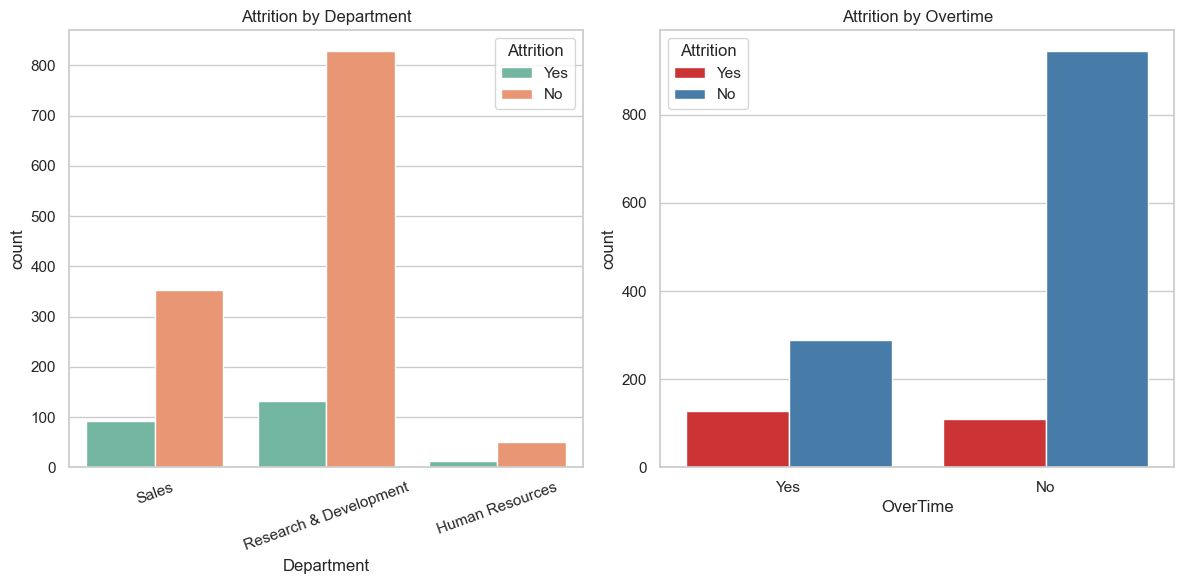

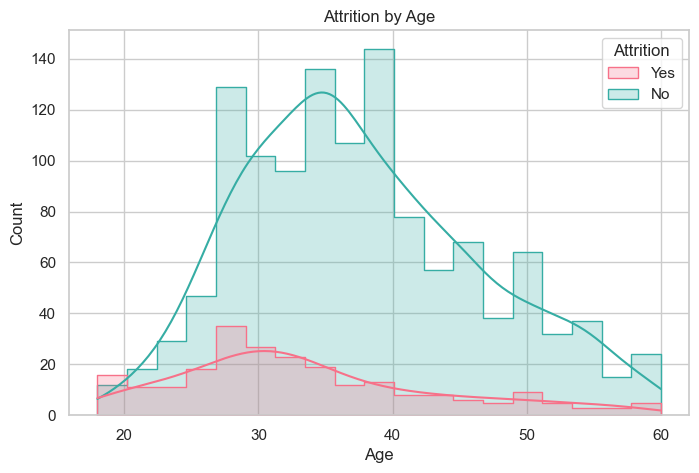

C:\Users\Huzaifa\AppData\Local\Temp\ipykernel_12624\871969305.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Attrition", y="MonthlyIncome", palette="coolwarm")


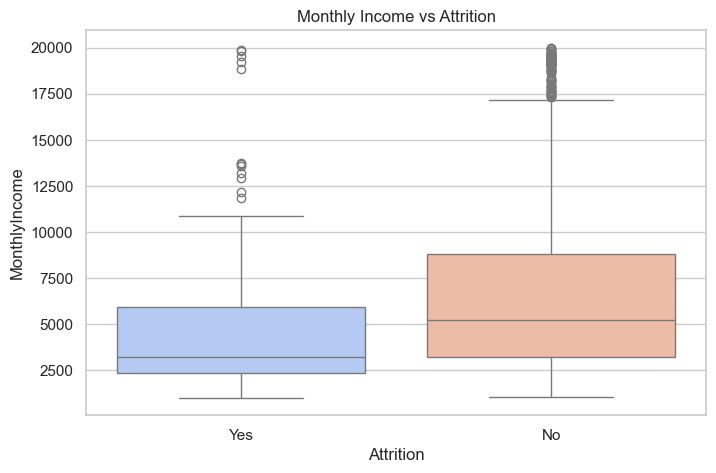

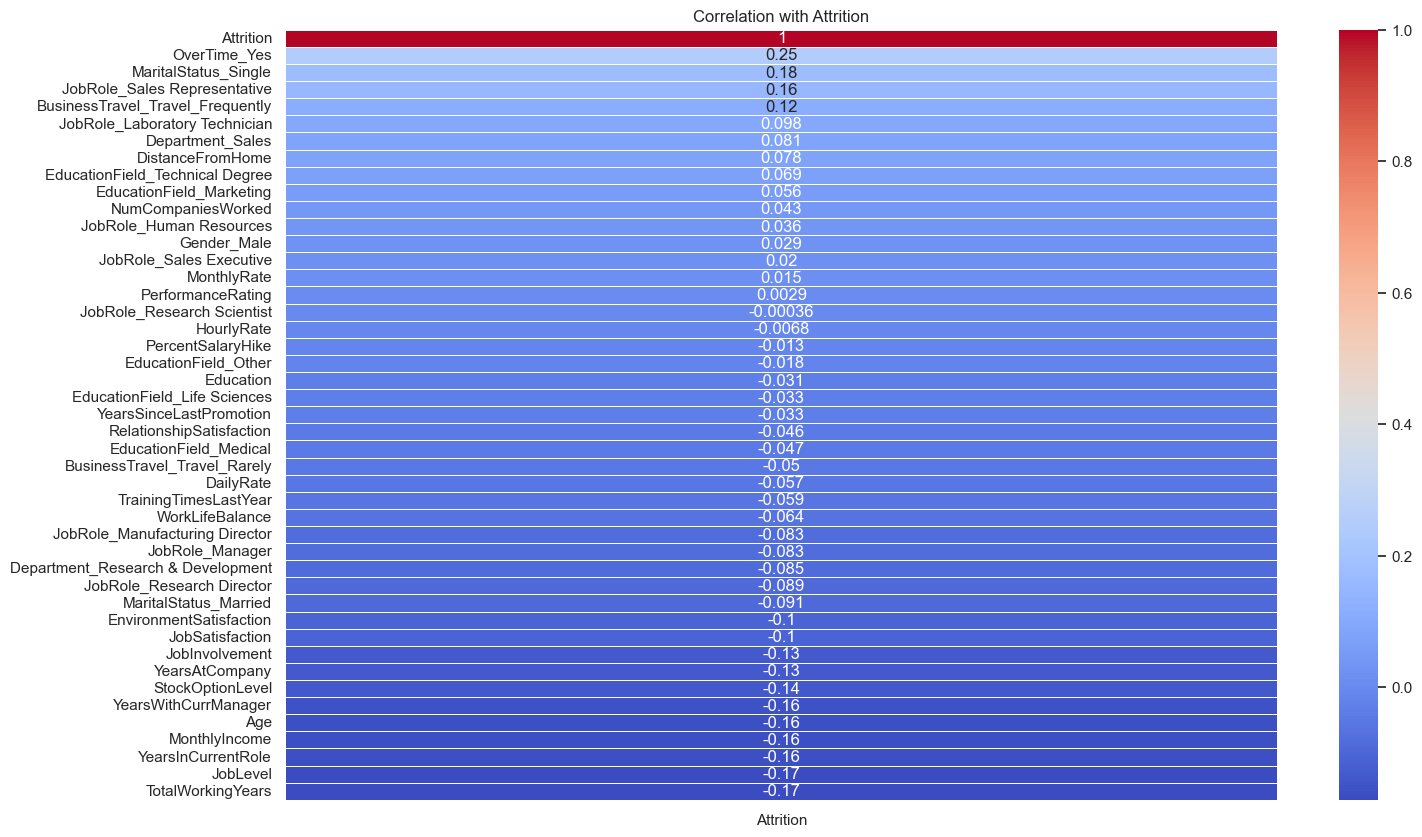

In [2]:
sns.set(style="whitegrid")

# 1. Overall Attrition Rate
attrition_rate = df["Attrition"].value_counts(normalize=True) * 100
print("Attrition Rate (%):\n", attrition_rate.round(2))

# 2. Attrition by Department
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x="Department", hue="Attrition", palette="Set2")
plt.title("Attrition by Department")
plt.xticks(rotation=20)

# 3. Attrition by Overtime
plt.subplot(1, 2, 2)
sns.countplot(data=df, x="OverTime", hue="Attrition", palette="Set1")
plt.title("Attrition by Overtime")
plt.tight_layout()
plt.show()

# 4. Attrition by Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="Age", hue="Attrition", kde=True, element="step", palette="husl")
plt.title("Attrition by Age")
plt.show()

# 5. Monthly Income Distribution
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Attrition", y="MonthlyIncome", palette="coolwarm")
plt.title("Monthly Income vs Attrition")
plt.show()

# 6. Correlation Heatmap
plt.figure(figsize=(16, 10))
corr = df_encoded.corr()
sns.heatmap(corr[['Attrition']].sort_values(by='Attrition', ascending=False),
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation with Attrition")
plt.show()